# Quora Insincere Question Classification - Deep Learning a Neural Networks

Outline:
1. Download the data from Kaggle
2. Prepare the data for modeling using TF-IDF
3. Train a deep learning model using PyTorch




## Download Data from Kaggle

Get the API key from https://kaggle.com/me/account

In [103]:
!ls

kaggle.json  sample_data


In [104]:
!pwd

/content


In [105]:
import os

In [106]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [107]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv

  0% 0.00/54.9M [00:00<?, ?B/s]
100% 54.9M/54.9M [00:00<00:00, 1.09GB/s]
  0% 0.00/15.8M [00:00<?, ?B/s]
100% 15.8M/15.8M [00:00<00:00, 636MB/s]
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 402MB/s]


In [108]:
train_fname = './train.csv'
test_fname = './test.csv'
sub_fname = './sample_submission.csv'

In [109]:
# Step 1: Rename .csv to .zip
!mv train.csv train.zip
!mv test.csv test.zip
!mv sample_submission.csv sample_submission.zip

# Step 2: Unzip all of them in the current directory
!unzip train.zip -d .
!unzip test.zip -d .
!unzip sample_submission.zip -d .

# Step 3 (Optional): Clean up zip files to avoid confusion
!rm train.zip test.zip sample_submission.zip

# Step 4: Check unzipped files
!ls -lh


Archive:  train.zip
  inflating: ./train.csv             
Archive:  test.zip
  inflating: ./test.csv              
Archive:  sample_submission.zip
  inflating: ./sample_submission.csv  
total 161M
-rw-r--r-- 1 root root   65 Jun 21 13:12 kaggle.json
drwxr-xr-x 1 root root 4.0K Jun 18 13:35 sample_data
-rw-r--r-- 1 root root 8.3M Dec 11  2019 sample_submission.csv
-rw-r--r-- 1 root root  34M Dec 11  2019 test.csv
-rw-r--r-- 1 root root 119M Dec 11  2019 train.csv


In [110]:
import pandas as pd

In [111]:
raw_df = pd.read_csv(train_fname)
test_df = pd.read_csv(test_fname)
sub_df = pd.read_csv(sub_fname)


In [112]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [113]:
raw_df.sample(10)

,qid,question_text,target
613442,7822d63e5090da51b10e,How do I Make remote to run car in different d...,0
1239672,f2f0aa32a4eeea4dfad1,Why do cops always pull me over even if I have...,0
73378,0e60c92f8c8525d71948,How do I get personal radiation monitoring don...,0
997000,c35e4b5e000688bce36f,"How did Luz Long prove that ""The important thi...",0
123392,18268c3eaeca84857de9,Is it good to attend the 600-800th world ranki...,0
945813,b957bd9fbe82fa3604e8,Which is best SDE 2 In Amazon or doing MS in C...,0
467224,5b7ea15ec9f6957f0dbb,If we get conceal handgun license criminal won...,0
602164,75f0a474b9c1987511b3,What is Bsc plain?,0
1227456,f08d1779bd428bdf095c,What is the best thing you've ever eaten?,0
141638,1bb9e144d36dbe1878b5,Do any University offer Masters in Hospital Ad...,0


In [114]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [115]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [116]:
SAMPLE_SIZE = 100_000
sample_df = raw_df.sample(100_000)

In [117]:
sample_df

,qid,question_text,target
1219526,ef051c731959b33c0d9a,Does the Jewish Mitvah say women can wear pant...,0
344997,4398dee5983cb5f2ebe3,How do I improve communication gap between mot...,0
698984,88ddb2a39b084c763af4,What affects how you get a loan?,0
1042602,cc4b78b0241288adb77e,How challenging is an economics major at Berke...,0
155029,1e531014305938766d26,"What is ""a communist country ""?",0
...,...,...,...
770729,9700761e8e1944ad2e8a,Why did Lim Ji-Hyun go back to North Korea?,0
1009326,c5c711299c97b99479cf,Who is Joey Rick?,0
1037057,cb34eca22cd6bdbef1e5,How do the standardized 'achievement' tests of...,0
189005,24f5df044dfce94b956d,Has the US or its allies recovered any equipme...,0


In [118]:
sample_df.target.value_counts(normalize=True)

,proportion
target,
0,0.93828
1,0.06172


## Prepare Data for Training

- Convert text to TF-IDF vectors
- Convert vectors to PyTorch tensors
- Create PyTorch Data Loaders

### Convert to TF-IDF Vectors

In [119]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [121]:
stemmer = SnowballStemmer(language='english')

In [122]:
english_stopwords = stopwords.words('english')

In [123]:
", ".join(english_stopwords)

"a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, shouldn, shouldn't, should've, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, 

In [124]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text)]

In [125]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, stop_words=english_stopwords, max_features=1000)

In [126]:
sample_df.question_text

,question_text
1219526,Does the Jewish Mitvah say women can wear pant...
344997,How do I improve communication gap between mot...
698984,What affects how you get a loan?
1042602,How challenging is an economics major at Berke...
155029,"What is ""a communist country ""?"
...,...
770729,Why did Lim Ji-Hyun go back to North Korea?
1009326,Who is Joey Rick?
1037057,How do the standardized 'achievement' tests of...
189005,Has the US or its allies recovered any equipme...


In [127]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 25.9 s, sys: 78.7 ms, total: 26 s
Wall time: 26.2 s


TfidfVectorizer(max_features=1000,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x7f3327f1aac0>)

In [128]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'acid', 'act', 'action', 'activ', 'actual',
       'ad', 'add', 'admiss', 'adult', 'advanc', 'advantag', 'advic',
       'affect', 'africa', 'african', 'age', 'ago', 'air', 'allow',
       'alon', 'alreadi', 'also', 'altern', 'alway', 'amazon', 'america',
       'american', 'among', 'amount', 'android', 'ani', 'anim', 'anoth',
       'answer', 'anyon', 'anyth', 'apart', 'app', 'appear', 'appl',
       'appli', 'applic', 'approach', 'arab', 'area', 'armi', 'around',
       'art', 'asian', 'ask', 'atheist', 'attack', 'attend', 'attract',
       'australia', 'avail', 'averag'], dtype=object)

Transform the questions into vectors


In [129]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 25.6 s, sys: 61.2 ms, total: 25.7 s
Wall time: 25.9 s


In [130]:
inputs.shape

(100000, 1000)

In [131]:
inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 548459 stored elements and shape (100000, 1000)>

In [132]:
inputs[0].toarray()[:50]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07462655, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [133]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 1min 36s, sys: 282 ms, total: 1min 37s
Wall time: 1min 37s


In [134]:
test_inputs.shape

(375806, 1000)

### Split the Training and Validation Set

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
targets = sample_df.target

In [137]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size = 0.3)

In [138]:
train_inputs.shape

(70000, 1000)

In [139]:
val_inputs.shape

(30000, 1000)

In [140]:
train_targets

,target
444341,0
1181077,0
365799,0
1017742,0
388982,0
...,...
677538,0
1012270,0
763323,0
18921,0


In [141]:
val_targets

,target
532822,0
299238,0
1263224,0
60682,0
1167590,0
...,...
342585,1
111271,0
567078,0
593351,0


## Convert to PyTorch Tensors

In [142]:
import torch

In [143]:
train_input_tensors = torch.tensor(train_inputs.toarray()).float()
val_input_tensors = torch.tensor(val_inputs.toarray()).float()

In [144]:
train_input_tensors.shape

torch.Size([70000, 1000])

In [145]:
val_input_tensors.shape

torch.Size([30000, 1000])

In [146]:
type(train_targets)

pandas.core.series.Series

In [147]:
train_target_tensors = torch.tensor(train_targets.values).float()
val_target_tensors = torch.tensor(val_targets.values).float()

In [148]:
test_input_tensors = torch.tensor(test_inputs.toarray()).float()

## Create PyTorch Data Loaders

In [149]:
from torch.utils.data import TensorDataset, DataLoader

In [150]:
train_ds = TensorDataset(train_input_tensors, train_target_tensors)
val_ds = TensorDataset(val_input_tensors, val_target_tensors)
test_ds = TensorDataset(test_input_tensors)

In [151]:
BATCH_SIZE = 128

In [152]:
train_dl = DataLoader(train_ds, batch_size = BATCH_SIZE, shuffle=True)
val_dl = DataLoader(val_ds, batch_size = BATCH_SIZE)
test_dl = DataLoader(test_ds, batch_size = BATCH_SIZE)

In [153]:
for batch in train_dl:
  batch_inputs = batch[0]
  batch_targets = batch[1]
  print('batch_inputs.shape', batch_inputs.shape)
  print('batch_targets.shape', batch_targets.shape)
  break

batch_inputs.shape torch.Size([128, 1000])
batch_targets.shape torch.Size([128])


In [154]:
len(train_dl)

547

In [155]:
547*128

70016

## Train Deep Learning Model

In [156]:
import torch.nn as nn
import torch.nn.functional as F

In [157]:
class QuoraNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(1000, 512)
    self.layer2 = nn.Linear(512, 256)
    self.layer3 = nn.Linear(256, 128)
    self.layer4 = nn.Linear(128, 1)
    pass

  def forward(self, inputs):
    out = self.layer1(inputs)
    out = F.relu(out)
    out = self.layer2(out)
    out = F.relu(out)
    out = self.layer3(out)
    out = F.relu(out)
    out = self.layer4(out)
    return out


In [158]:
model = QuoraNet()

In [159]:
from sklearn.metrics import accuracy_score, f1_score

In [160]:
for batch in train_dl:
  bi, bt = batch
  print('inputs.shape', bi.shape)
  print('targets.shape', bt.shape)

  bo = model(bi)
  print('bo.shape', bo.shape)

  # Convert outputs to probabilities
  probs = torch.sigmoid(bo[:, 0])
  print('probs', probs[:10])

  #Convert probs to predictions
  preds = (probs > 0.5).int()
  print('preds', preds[:10])
  print('targets', bt[:10])

  # Check metrics
  print('accuracy', accuracy_score(bt, preds))
  print('f1_score', f1_score(bt, preds))

  #Loss
  print('loss', F.binary_cross_entropy(preds.float(), bt))

  break

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
bo.shape torch.Size([128, 1])
probs tensor([0.5022, 0.5020, 0.5019, 0.5018, 0.5022, 0.5018, 0.5020, 0.5018, 0.5018,
        0.5021], grad_fn=<SliceBackward0>)
preds tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)
targets tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
accuracy 0.0625
f1_score 0.11764705882352941
loss tensor(93.7500)


In [161]:
bi[:10]

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.4644, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [162]:
bt[:10]

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [163]:
bo[:10]

tensor([[0.0087],
        [0.0080],
        [0.0074],
        [0.0072],
        [0.0087],
        [0.0071],
        [0.0080],
        [0.0072],
        [0.0071],
        [0.0083]], grad_fn=<SliceBackward0>)

In [174]:
# Evaluate model performance
def evaluate(model, dl):
  losses, accs, f1s = [], [], []
  # Loop over batches
  for batch in dl:
    #Get inputs through model
    inputs, targets = batch

    # Pass inputs through model
    outputs = model(inputs)

    # Convert to probabilities
    probs = torch.sigmoid(outputs[:, 0])

    # Compute loss
    loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20))

    # Compute preds
    preds = (probs > 0.5).int()

    # Compute accuracy
    acc = accuracy_score(targets, preds)

    # Compute f1 score
    f1 = f1_score(targets, preds)

    losses.append(loss.item())
    accs.append(acc)
    f1s.append(f1)

  return (torch.mean(torch.tensor(losses)).item(),
          torch.mean(torch.tensor(accs)).item(),
          torch.mean(torch.tensor(f1s)).item())

In [165]:
evaluate(model, train_dl)

(0.6965329647064209, 0.06241634115576744, 0.11676439642906189)

In [166]:
evaluate(model, val_dl)

(0.6965521574020386, 0.06021719425916672, 0.11286137998104095)

In [175]:
# Train the model batch by batch
def fit(epochs, lr, model, train_dl, val_dl ):
  history = []
  optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=1e-5)

  for epoch in range(epochs):
    #Training phase
    for batch in train_dl:
      #Get inputs and targets
      inputs, targets = batch

      #GEt model outputs
      outputs = model(inputs)

      #Get probabilities
      probs = torch.sigmoid(outputs[:, 0])

      #Compute loss
      loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20))

      #Perform the optimization
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

   # Evaluation phase
    loss, acc, f1 = evaluate(model, val_dl)
    print('Epoch {}; Loss: {:.4f}; Accuracy: {:.4f}; F1 Score: {:.4f}'.format(
         epoch+1, loss, acc, f1))
    history.append([loss, acc, f1])
  return history




In [176]:
model = QuoraNet()

In [177]:
history = []

In [178]:
history.append(evaluate(model, train_dl))

In [179]:
history

[(14.024627685546875, 0.062418386340141296, 0.11672072112560272)]

In [181]:
history += fit(5, 0.0001, model, train_dl, val_dl)

Epoch 1; Loss: 6.2311; Accuracy: 0.9406; F1 Score: 0.3750
Epoch 2; Loss: 6.8431; Accuracy: 0.9400; F1 Score: 0.3545
Epoch 3; Loss: 7.1346; Accuracy: 0.9392; F1 Score: 0.3629
Epoch 4; Loss: 7.7021; Accuracy: 0.9397; F1 Score: 0.3530
Epoch 5; Loss: 8.1023; Accuracy: 0.9398; F1 Score: 0.3542


In [182]:
history

[(14.024627685546875, 0.062418386340141296, 0.11672072112560272),
 [3.1315877437591553, 0.9449689984321594, 0.32935628294944763],
 [3.1066040992736816, 0.9460993409156799, 0.31549715995788574],
 [3.1196324825286865, 0.9464206099510193, 0.37737494707107544],
 [3.718395948410034, 0.9435283541679382, 0.38882482051849365],
 [5.225184917449951, 0.9394171237945557, 0.37869611382484436],
 [6.231098175048828, 0.9405807256698608, 0.3750414550304413],
 [6.843079090118408, 0.9400488138198853, 0.3545069694519043],
 [7.134592056274414, 0.9392176866531372, 0.3628762364387512],
 [7.702138900756836, 0.9397163391113281, 0.35298535227775574],
 [8.102303504943848, 0.9398161172866821, 0.35424378514289856]]

In [183]:
losses = [item[0] for item in history]
accs = [item[1] for item in history]
f1s = [item[2] for item in history]

In [184]:
import matplotlib.pyplot as plt

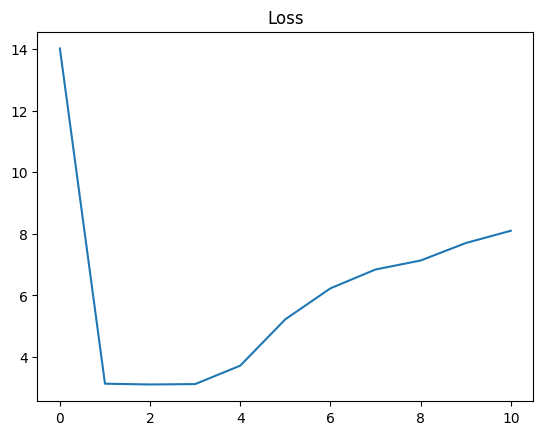

In [185]:
plt.title('Loss')
plt.plot(losses)

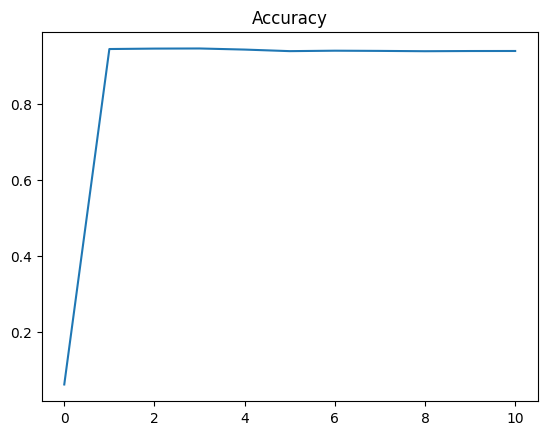

In [186]:
plt.title('Accuracy')
plt.plot(accs)

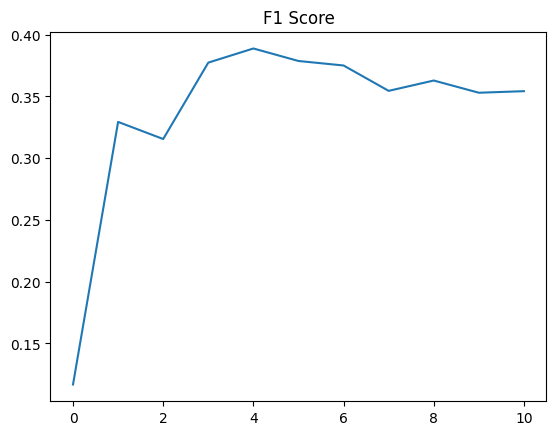

In [187]:
plt.title('F1 Score')
plt.plot(f1s)

### Make predictions on example data

In [215]:
small_df = raw_df.sample(20)

In [216]:
small_df

,qid,question_text,target
21060,0421d19931760d41b515,Which season comes in which month in Hindi mon...,0
513531,648ebb85e9b6d20532b5,How can I simplify complicated ideas (game pro...,0
229632,2cea382ce25aace19ff9,How can I make the most of this summer break?,0
546913,6b245c9b19002a3d06c1,Why do humans divide God between existence and...,0
452712,58ae219a42a84c9a455f,Why do the dragons listen to Daenerys Targarye...,0
346061,43ccf2df56b195a248d1,What impact did Michelangelo have on modern so...,0
604171,7650972ad28fd5b579e1,Is Naruto the strongest shinobi ever?,0
1268068,f883d6034e187fc3f9d2,"As a liberal, have you grown to respect (irres...",1
278575,3688530c0d26459c2938,What is your review of Michael Solomonov's Zah...,0
565552,6ecde2a985701d61d7ee,Is the calorie intake of conjoined twins diffe...,0


In [217]:

def predict_df(df):
  inputs = vectorizer.transform(df.question_text)
  inputs_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(inputs_tensors)
  probs = torch.sigmoid(outputs[:, 0])
  preds = (probs > 0.5).int()
  return preds

In [218]:
small_df.target.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [219]:
predict_df(small_df)

tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=torch.int32)

In [220]:
small_df.question_text.values

array(['Which season comes in which month in Hindi months?',
       'How can I simplify complicated ideas (game programming)?',
       'How can I make the most of this summer break?',
       'Why do humans divide God between existence and non-existence if he exists and does not exist at the same time?',
       'Why do the dragons listen to Daenerys Targaryen (Khaleesi)?',
       'What impact did Michelangelo have on modern society?',
       'Is Naruto the strongest shinobi ever?',
       "As a liberal, have you grown to respect (irrespective of whether or not you like him) Trump's political acumen, now that he has the seasoned democrats in such a bind?",
       "What is your review of Michael Solomonov's Zahav restaurant in Philadelphia?",
       'Is the calorie intake of conjoined twins different from the one of a single person?',
       'At 1,000,000,000,000 Kelvin hadrons "melt" into Gluons. Would we consider this plasma, or a fifth state of matter?',
       'Why do people support f

In [221]:
def predict_text(text):
  df = pd.DataFrame({'question_text': [text]})
  inputs = vectorizer.transform(df.question_text)
  inputs_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(inputs_tensors)
  probs = torch.sigmoid(outputs[:, 0])
  preds = (probs > 0.5).int()
  return preds

In [222]:
predict_text("What is the function of a plasma cell?")

tensor([0], dtype=torch.int32)

In [223]:
predict_text("Why can't liberals realize that they're stupid?")

tensor([1], dtype=torch.int32)

## Generate Predictions for Test Set

In [224]:
test_inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2056786 stored elements and shape (375806, 1000)>

In [236]:
import numpy as np
def make_preds(dl):
  all_preds = []
  for batch in dl:
    inputs = batch[0]
    outputs = model(inputs)
    probs = torch.sigmoid(outputs[:, 0])
    preds = (probs > 0.5).int()
    all_preds.append(preds.detach().numpy())

  return np.concatenate(all_preds)

In [242]:
for batch in test_dl:
  print(batch[0][0])
  break

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0620, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [237]:
test_preds = make_preds(test_dl)

In [238]:
len(test_preds)

375806

In [239]:
test_preds

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [241]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [243]:
sub_df.predictions = test_preds

/tmp/ipython-input-243-1027450667.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  sub_df.predictions = test_preds


In [240]:
pd.Series(test_preds).value_counts()

,count
0,361918
1,13888


In [244]:
sub_df.prediction.value_counts()

,count
prediction,
0,375806


In [245]:
sub_df.to_csv('submission.csv', index=None)